<a href="https://colab.research.google.com/github/SaltySugar32/MachineLearningCourse/blob/main/labs(bachelor)/%D0%9F%D0%BE%D0%BB%D0%B5%D1%81%D1%8F_%D0%914_%D0%A4%D0%B8%D0%BD%D0%B0%D0%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Финальное задание


Сравнить решающие правила, полученные разными методами машинного обучения (из ваших предыдущих заданий), на основе одной (выбранной вами) обучающей выборки, и определить лучшее. Шаблона в этот раз не будет. Однако, будет ряд требований к результату:
- Задание необходимо выполнить в среде Google Colaboratory и прислать на него ссылку.
- Задание должно содержать сводную таблицу численных оценок качества каждого метода.
- Желательно включить в список исследованных методов Наивный байесовский классификатор.
- При выборе лучшего решающего правила должно быть указано подробное обоснование выбора.
- Дополнительно оцениваемым элементом задания будет являться использование материала последнего занятия (посвящённого качеству классификации), а также осмысленно применённой визуализации, иллюстрирующей ваш выбор лучшего решающего правила.

## Библиотеки

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch

from sklearn.datasets import make_classification, load_iris, load_wine
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#окно парзена
from sklearn.neighbors import RadiusNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Задание выполнил

- Студент: Полеся Виталий

- Группа: Б9118-09.03.04прогин

--- 

Выборка данных Balance-Scale Dataset

*   Предметная область: Классификация состояния весов
*   Задача: классифицировать состояния весов
*   Классы: 3 - перевес влево, перевес вправо, сбалансированные весы
*   Признаки: 4 - вес левой/правой чаши, длина левого/правого плеча весов
*   Объекты: 625


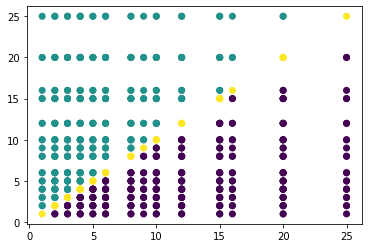

In [ ]:
# Загрузка выборки 
dataset_dir ="https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data"
data = pd.read_csv(dataset_dir, names=["class", "lw", "ld", "rw", "rd"])

# сделал 2 признака из 4х дефолтных:
Xl = np.vstack(data['lw'].multiply(data['ld']))
Xr = np.vstack(data['rw'].multiply(data['rd']))

Y = data['class'].replace("L", 0).replace("R", 1).replace("B", 2)

X_train, X_test, Y_train, Y_test = train_test_split(np.hstack([Xl, Xr]), np.hstack([Y]), 
                                                    test_size=0.2, 
                                                    random_state=2)

# график
plt.scatter(Xl, Xr, c=Y)

## Метрические методы

### Метод k ближ. соседей

In [ ]:
print('K\t', 'Обучение\t', 'Контроль');

models = []
for n_neighbors in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, Y_train)
    models.append(model)
    print(n_neighbors, '\t', model.score(X_train, Y_train), end='')
    a = str(model.score(X_train, Y_train))
    if len(a) < 6:
        print('\t', end='')
    print('\t', model.score(X_test, Y_test))   
 

K	 Обучение	 Контроль
1 	 1.0		 0.976
2 	 0.994		 0.992
3 	 0.992		 0.968
4 	 0.992		 0.968
5 	 0.976		 0.936
6 	 0.968		 0.944
7 	 0.95		 0.896
8 	 0.944		 0.92
9 	 0.94		 0.904
10 	 0.95		 0.912
11 	 0.942		 0.92
12 	 0.946		 0.936
13 	 0.95		 0.928
14 	 0.95		 0.928
15 	 0.944		 0.92
16 	 0.942		 0.928
17 	 0.938		 0.928
18 	 0.938		 0.928
19 	 0.942		 0.928
20 	 0.92		 0.896
21 	 0.928		 0.912
22 	 0.92		 0.912
23 	 0.92		 0.912
24 	 0.924		 0.912
25 	 0.924		 0.912
26 	 0.924		 0.912
27 	 0.924		 0.912
28 	 0.924		 0.912
29 	 0.924		 0.912


При neighbors = 2 достигаются лучшие показатели долей правильных ответов одновеменно на обучении (0.944) и контроле (0.992).

In [ ]:
# Применение алгоритма классификации
model =  KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, Y_train)

# Accuracy — доля правильных ответов алгоритма
print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_train, model.predict(X_train)))
print(classification_report(Y_test, model.predict(X_test)))

Train:  0.994
Test :  0.992
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       0.99      1.00      1.00       227
           2       1.00      0.92      0.96        38

    accuracy                           0.99       500
   macro avg       1.00      0.97      0.98       500
weighted avg       0.99      0.99      0.99       500

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      1.00      1.00        61
           2       1.00      0.91      0.95        11

    accuracy                           0.99       125
   macro avg       0.99      0.97      0.98       125
weighted avg       0.99      0.99      0.99       125



### Окно Парзена

In [ ]:
print('R\t', 'Обучение\t', 'Контроль');

models = []
for radius in range(1, 30):
    model = RadiusNeighborsClassifier(radius=radius)
    model.fit(X_train, Y_train)
    models.append(model)
    print(radius, '\t', model.score(X_train, Y_train), end='')
    a = str(model.score(X_train, Y_train))
    if len(a) < 6:
        print('\t', end='')
    print('\t', model.score(X_test, Y_test)) 

R	 Обучение	 Контроль
1 	 0.95		 0.944
2 	 0.934		 0.92
3 	 0.926		 0.92
4 	 0.928		 0.92
5 	 0.924		 0.912
6 	 0.92		 0.912
7 	 0.92		 0.912
8 	 0.922		 0.912
9 	 0.91		 0.912
10 	 0.922		 0.904
11 	 0.922		 0.904
12 	 0.91		 0.888
13 	 0.898		 0.888
14 	 0.866		 0.84
15 	 0.874		 0.856
16 	 0.878		 0.856
17 	 0.862		 0.856
18 	 0.852		 0.8
19 	 0.802		 0.744
20 	 0.794		 0.728
21 	 0.782		 0.664
22 	 0.73		 0.648
23 	 0.672		 0.608
24 	 0.612		 0.536
25 	 0.56		 0.472
26 	 0.516		 0.448
27 	 0.504		 0.432
28 	 0.494		 0.424
29 	 0.48		 0.424


При radius = 1 достигаются лучшие показатели долей правильных ответов одновременно на обучении (0.95) и контроле (0.944)

In [ ]:
# Применение алгоритма классификации
model =  RadiusNeighborsClassifier(radius=1)
model.fit(X_train, Y_train)

# Accuracy — доля правильных ответов алгоритма
print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_train, model.predict(X_train)))
print(classification_report(Y_test, model.predict(X_test)))

Train:  0.95
Test :  0.944
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       235
           1       0.95      0.99      0.97       227
           2       0.81      0.45      0.58        38

    accuracy                           0.95       500
   macro avg       0.91      0.81      0.84       500
weighted avg       0.95      0.95      0.94       500

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        53
           1       0.94      1.00      0.97        61
           2       1.00      0.36      0.53        11

    accuracy                           0.94       125
   macro avg       0.96      0.79      0.82       125
weighted avg       0.95      0.94      0.93       125



## Логические методы

### Алгоритм "Решающее дерево".

In [ ]:
# Подбор параметров entropy
print('N\t Train\t Test')
for num in range(20):
  model = DecisionTreeClassifier(criterion='entropy', max_depth=num+1, random_state=0)
  model.fit(X_train, Y_train)
  #print(num+1, '\t', model.score(X_train, Y_train), "\t", model.score(X_test, Y_test))
  print(num+1, '\t', round(model.score(X_train, Y_train), 3), "\t", round(model.score(X_test, Y_test), 3))

N	 Train	 Test
1 	 0.728 	 0.64
2 	 0.786 	 0.808
3 	 0.858 	 0.776
4 	 0.914 	 0.864
5 	 0.936 	 0.904
6 	 0.964 	 0.904
7 	 0.976 	 0.96
8 	 1.0 	 0.992
9 	 1.0 	 0.992
10 	 1.0 	 0.992
11 	 1.0 	 0.992
12 	 1.0 	 0.992
13 	 1.0 	 0.992
14 	 1.0 	 0.992
15 	 1.0 	 0.992
16 	 1.0 	 0.992
17 	 1.0 	 0.992
18 	 1.0 	 0.992
19 	 1.0 	 0.992
20 	 1.0 	 0.992


In [ ]:
# Подбор параметров gini
print('N\t Train\t Test')
for num in range(20):
  model = DecisionTreeClassifier(criterion='gini', max_depth=num+1, random_state=0)
  model.fit(X_train, Y_train)
  #print(num+1, '\t', model.score(X_train, Y_train), "\t", model.score(X_test, Y_test))
  print(num+1, '\t', round(model.score(X_train, Y_train), 3), "\t", round(model.score(X_test, Y_test), 3))


N	 Train	 Test
1 	 0.728 	 0.64
2 	 0.832 	 0.8
3 	 0.88 	 0.824
4 	 0.91 	 0.896
5 	 0.95 	 0.952
6 	 0.986 	 0.984
7 	 0.994 	 0.992
8 	 1.0 	 0.992
9 	 1.0 	 0.992
10 	 1.0 	 0.992
11 	 1.0 	 0.992
12 	 1.0 	 0.992
13 	 1.0 	 0.992
14 	 1.0 	 0.992
15 	 1.0 	 0.992
16 	 1.0 	 0.992
17 	 1.0 	 0.992
18 	 1.0 	 0.992
19 	 1.0 	 0.992
20 	 1.0 	 0.992


Результаты: 
  * Gini и entropy показывают схожие результаты, однако при (max_depth<8) у gini лучше показатели.
  * лучший показатель доли правильных ответов на обучении = 1.0 при max_depth=8
  * лучший показатель доли правильных ответов на контроле = 0.992 при max_depth=8
  
Вывод: 
Лучшее сочетание параметров: criterion=gini, max_depth=8

In [ ]:
# Применение алгоритма классификации

# Критерии информативности: энтропийный (entroy) и Джини (gini)
model = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=0)
model.fit(X_train, Y_train)

# Accuracy — доля правильных ответов алгоритма
print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_test, model.predict(X_test)))
print(classification_report(Y_train, model.predict(X_train)))

Train:  1.0
Test :  0.992
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      1.00      1.00        61
           2       1.00      0.91      0.95        11

    accuracy                           0.99       125
   macro avg       0.99      0.97      0.98       125
weighted avg       0.99      0.99      0.99       125

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       227
           2       1.00      1.00      1.00        38

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



Train				 Test


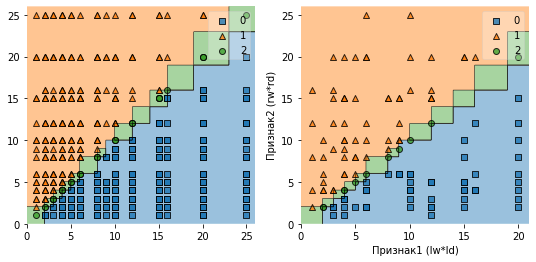

In [ ]:
fig, gs = plt.figure(figsize=(9,4)), gridspec.GridSpec(1, 2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))

print("Train\t\t\t\t Test")
plt.xlabel('Признак1 (lw*ld)')
plt.ylabel('Признак2 (rw*rd)')
plot_decision_regions(X_train, Y_train, clf=model, ax = ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plt.show()

### Алгоритм "Случайный лес" (ансамбль деревьев).

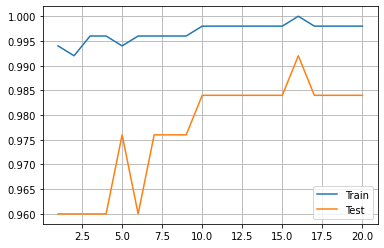

In [ ]:
#Подбор n_estimators

models = []
scores_train = []
scores_test = []
n_estimators = list(range(1, 21))
for estimators in n_estimators:
    model = RandomForestClassifier(criterion='gini', n_estimators=estimators,
                                   random_state=0)
    model.fit(X_train, Y_train)
    models.append(model)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

plt.plot(n_estimators, scores_train, label='Train')
plt.plot(n_estimators, scores_test, label='Test')

plt.legend(loc='best')
plt.grid()
plt.show()

* При n_estimators= 16 достигаются лучшие показатели долей правильных ответов на контроле (0.992) и обучении (1.0)

In [ ]:
# Применение алгоритма классификации

# Критерии информативности: энтропийный (entroy) и Джини (gini)
model = RandomForestClassifier(criterion='gini', n_estimators=19,
                               max_depth=9, random_state=0, max_features=2)
model.fit(X_train, Y_train)

# Accuracy — доля правильных ответов алгоритма
print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_test, model.predict(X_test)))
print(classification_report(Y_train, model.predict(X_train)))

Train:  0.998
Test :  0.968
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      0.95      0.97        61
           2       0.77      0.91      0.83        11

    accuracy                           0.97       125
   macro avg       0.92      0.95      0.93       125
weighted avg       0.97      0.97      0.97       125

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       227
           2       0.97      1.00      0.99        38

    accuracy                           1.00       500
   macro avg       0.99      1.00      0.99       500
weighted avg       1.00      1.00      1.00       500



## Линейные методы

### Метод опорных векторов (SVM)

### Зависимость результата от константы C

In [ ]:
# Подбор значения гиперпараметра регуляризации C 

for i in np.arange(0.09, 0.1, 0.001):
  model = SVC(kernel="linear", C=i)
  model.fit(X_train, Y_train)
  train_score = model.score(X_train, Y_train)
  test_score = model.score(X_test, Y_test)
  #if train_score == 1 and test_score == 1:
  print(i,'\tTrain: ', train_score, '\tTest : ', test_score)
  #break

0.09 	Train:  0.978 	Test :  0.976
0.091 	Train:  0.992 	Test :  0.968
0.092 	Train:  0.958 	Test :  0.944
0.093 	Train:  0.996 	Test :  1.0
0.094 	Train:  0.958 	Test :  0.944
0.095 	Train:  0.958 	Test :  0.944
0.096 	Train:  1.0 	Test :  1.0
0.097 	Train:  1.0 	Test :  1.0
0.098 	Train:  1.0 	Test :  1.0
0.099 	Train:  1.0 	Test :  1.0
0.1 	Train:  1.0 	Test :  1.0


Как можно увидеть, при с = 0.096, достигается ~первые лучшие показатели на обучении и контроле. Далее для удобства было принято c=0.096 как лучшее значение гиперпараметра.

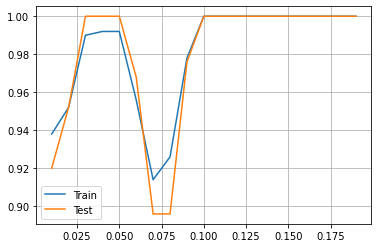

In [ ]:
models = []
scores_train = []
scores_test = []
C_values = list(np.arange(0.01, 0.2, 0.01))
for local_C in C_values:
    model = SVC(kernel="linear", C=local_C)
    model.fit(X_train, Y_train)
    models.append(model)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

plt.plot(C_values, scores_train, label='Train')
plt.plot(C_values, scores_test, label='Test')

plt.legend(loc='best')
plt.grid()
plt.show()

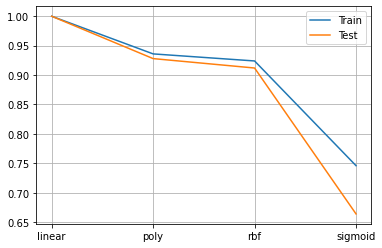

In [ ]:
# Зависимость от ядра

models = []
scores_train = []
scores_test = []
kernels = ('linear', 'poly', 'rbf', 'sigmoid')
for local_kernel in kernels:
    model = SVC(kernel=local_kernel, C=0.096)
    model.fit(X_train, Y_train)
    models.append(model)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

plt.plot(kernels, scores_train, label='Train')
plt.plot(kernels, scores_test, label='Test')

plt.legend(loc='best')
plt.grid()
plt.show()

linear оказался лучшим (доли правильных ответов на контроле = 1.0, на обучении = 1.0)

In [ ]:
# Применение алгоритма классификации
model = SVC(kernel="linear", C=0.096)
model.fit(X_train, Y_train)

# Accuracy — доля правильных ответов алгоритма
print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_train, model.predict(X_train)))
print(classification_report(Y_test, model.predict(X_test)))

Train:  1.0
Test :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       227
           2       1.00      1.00      1.00        38

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        11

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



## Заключение

Среди всех рассмотренных методов лучшим оказался:

Линейный метод. Метод опорных объектов(SVM)

С ядром linear достигается лучшие показатели долей правильных ответов:
- Качество на обучающей выборке: 1.0 при c=0.096
- Качество на контрольной выборке: 1.0 при c=0.096
